In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
ad = sc.read_h5ad('../../data/talbot_xenium.h5ad')
ad = ad[ad.obs.tissue != 'tumor']
ad

View of AnnData object with n_obs × n_vars = 223359 × 5006
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'run', 'sample_folder', 'sample___', 'condition', 'tissue', 'genotype', 'timepoint', 'seg_method_short', 'n_genes_by_counts', 'sample_id'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'spatial'

In [3]:
sc.pp.calculate_qc_metrics(ad, percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(ad,min_counts=30)
sc.pp.filter_cells(ad,min_genes=10)

In [4]:
sc.pp.normalize_total(ad, inplace=True,target_sum=100)
sc.pp.log1p(ad)

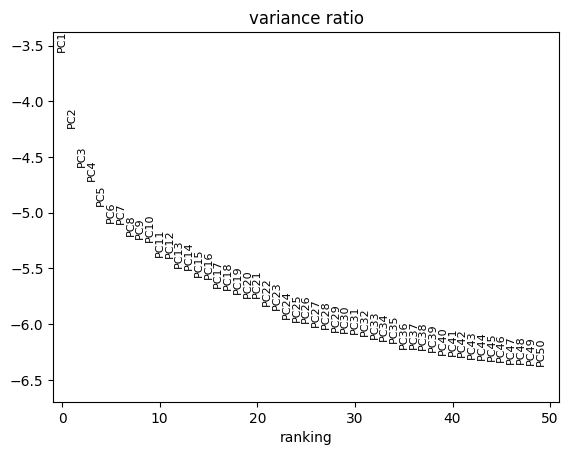

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
plt.rcdefaults()
sc.tl.pca(ad)
sc.pl.pca_variance_ratio(ad, n_pcs=50, log=True)
sc.pp.neighbors(ad, n_neighbors=15, n_pcs=30)

In [6]:
resolutions = [0.5, 1]
for resolution in resolutions: 
    print('clustering at resolution '+str(resolution))
    sc.tl.leiden(ad, resolution = resolution, key_added = 'leiden_'+str(resolution))
    print("done")

clustering at resolution 0.5
done
clustering at resolution 1
done


In [7]:
sc.tl.umap(ad, min_dist=0.1)

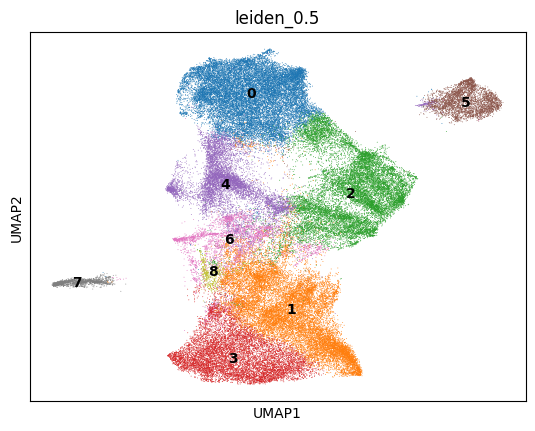

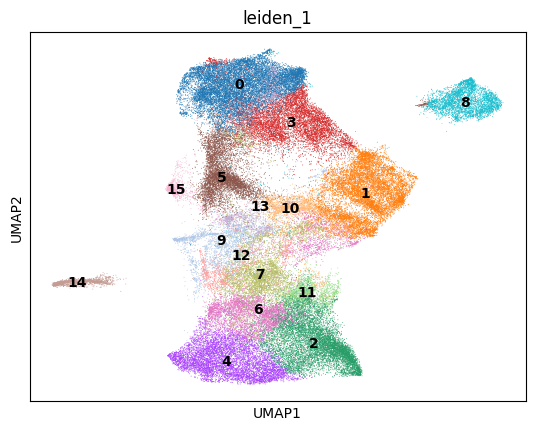

In [8]:
sc.pl.umap(ad, color = 'leiden_0.5', legend_loc = 'on data')
sc.pl.umap(ad, color = 'leiden_1', legend_loc = 'on data')

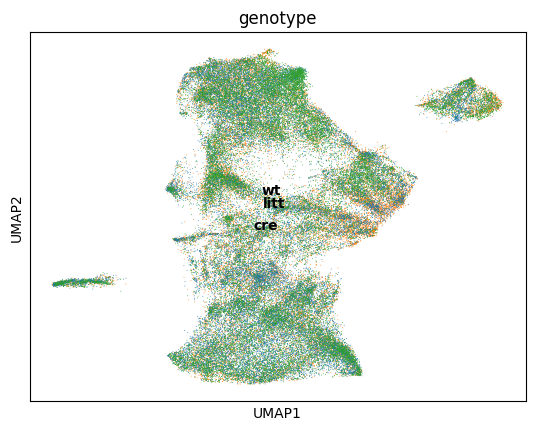

In [9]:
sc.pl.umap(ad, color = 'genotype', legend_loc = 'on data')

litt_24h


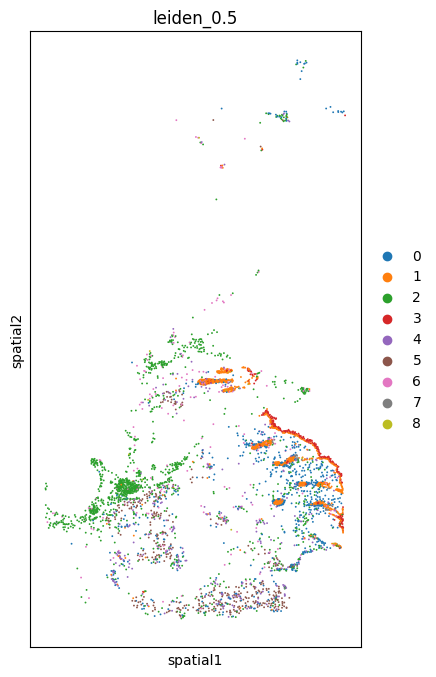

litt_24h


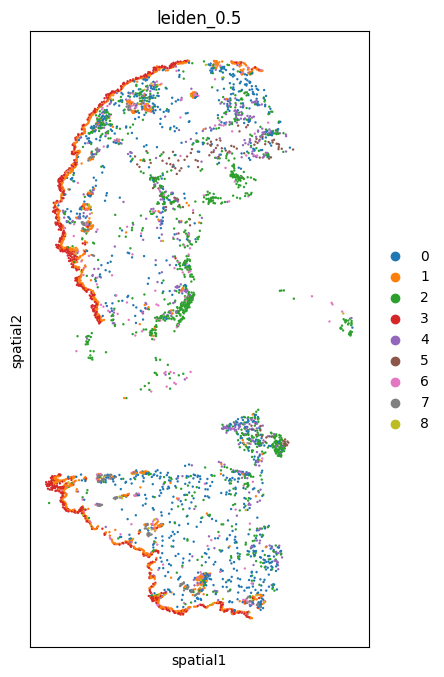

litt_24h


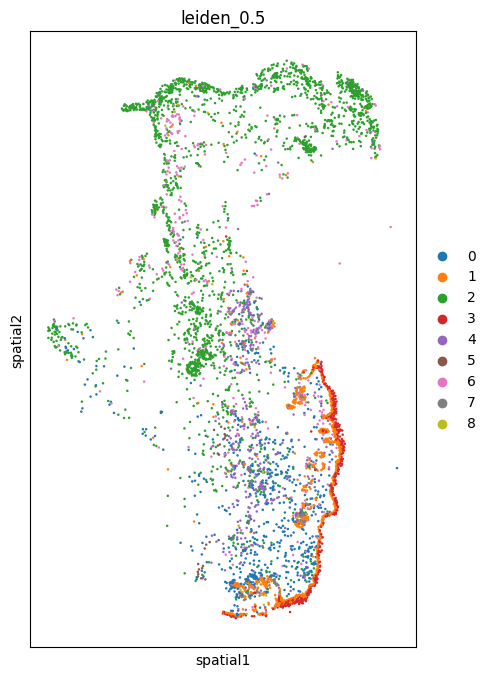

litt_72h


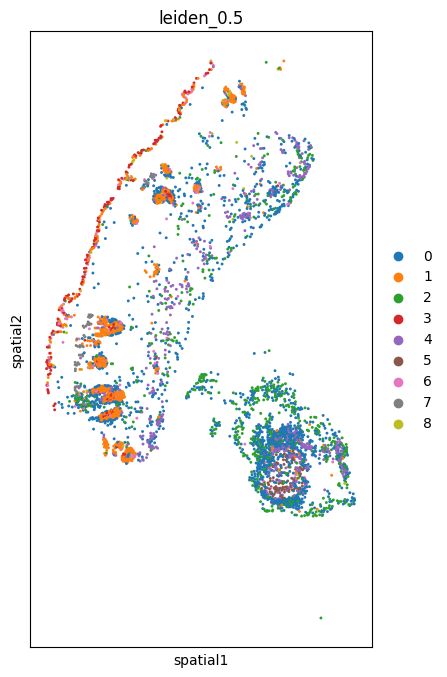

litt_72h


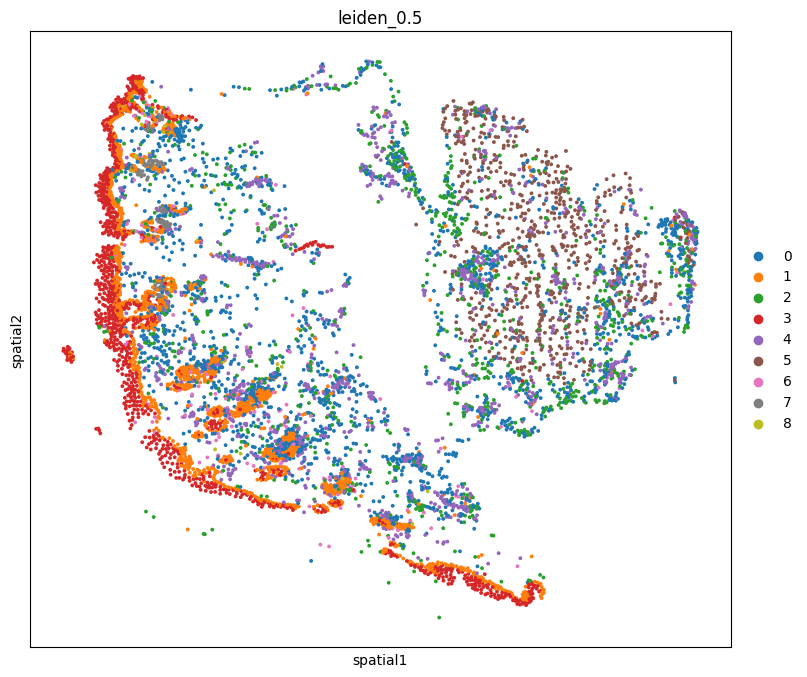

litt_72h


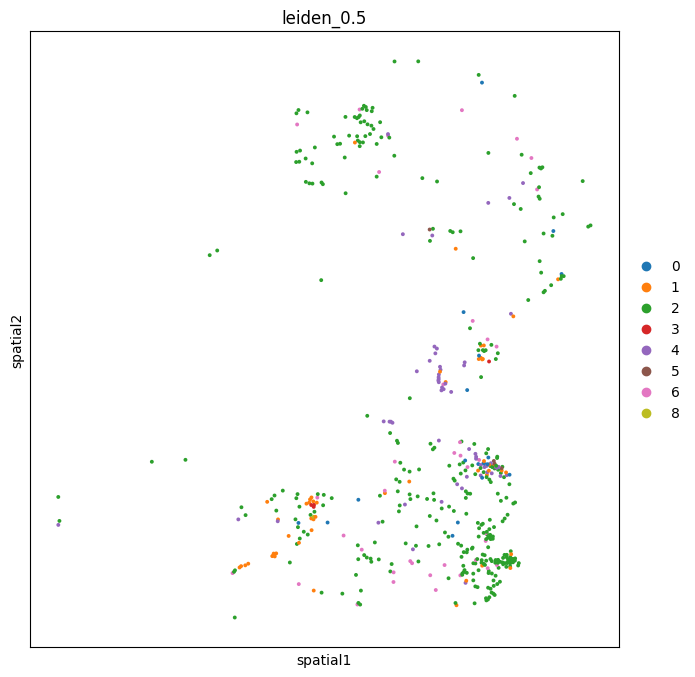

cre_72h


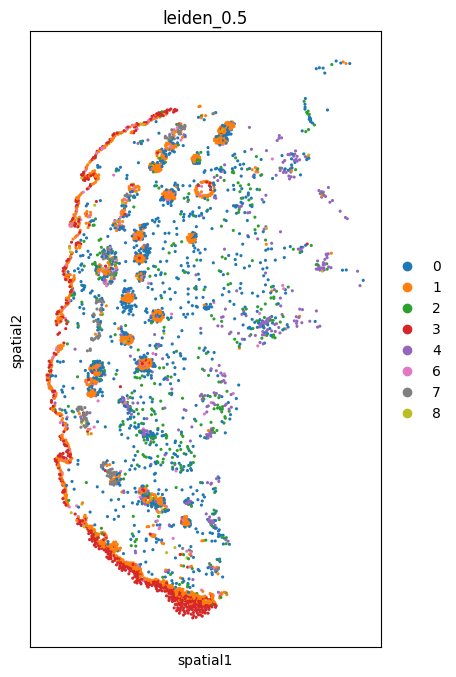

cre_72h


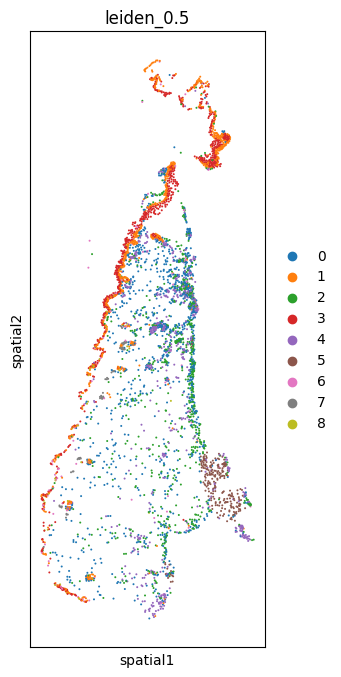

cre_72h


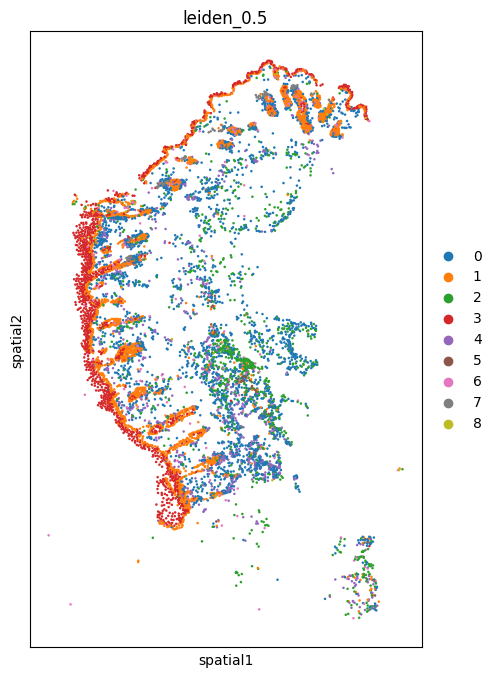

wt_72h


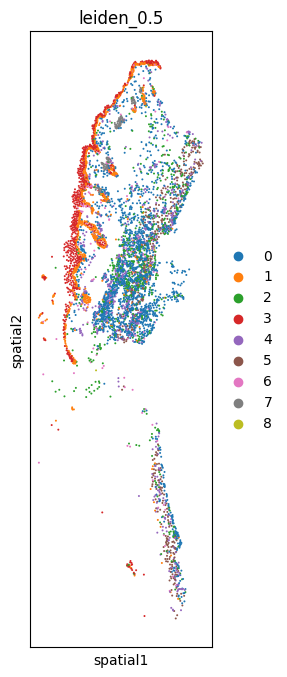

wt_72h


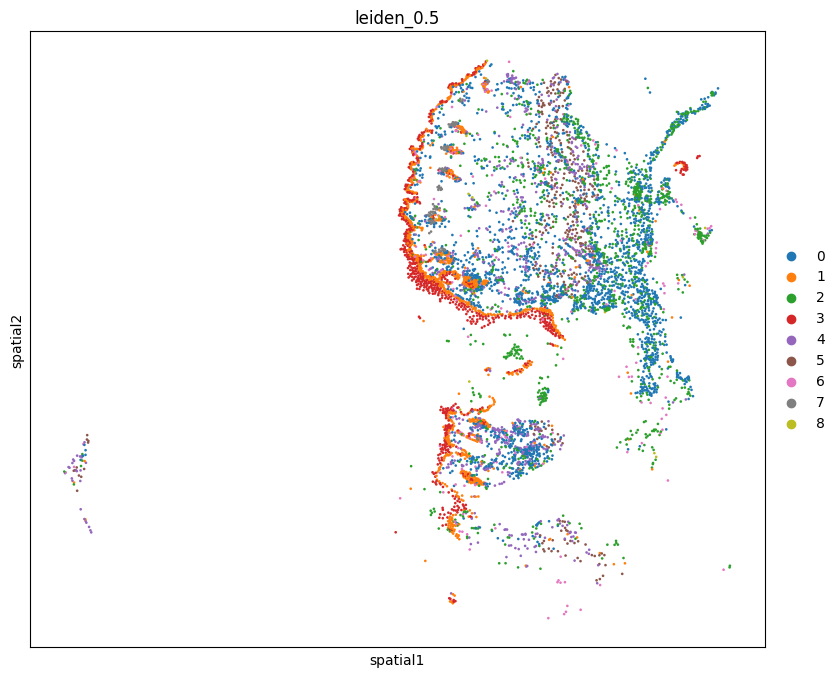

wt_72h


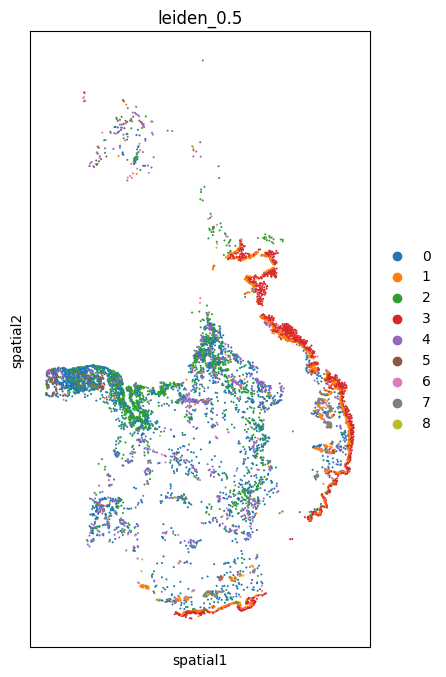

cre_24h


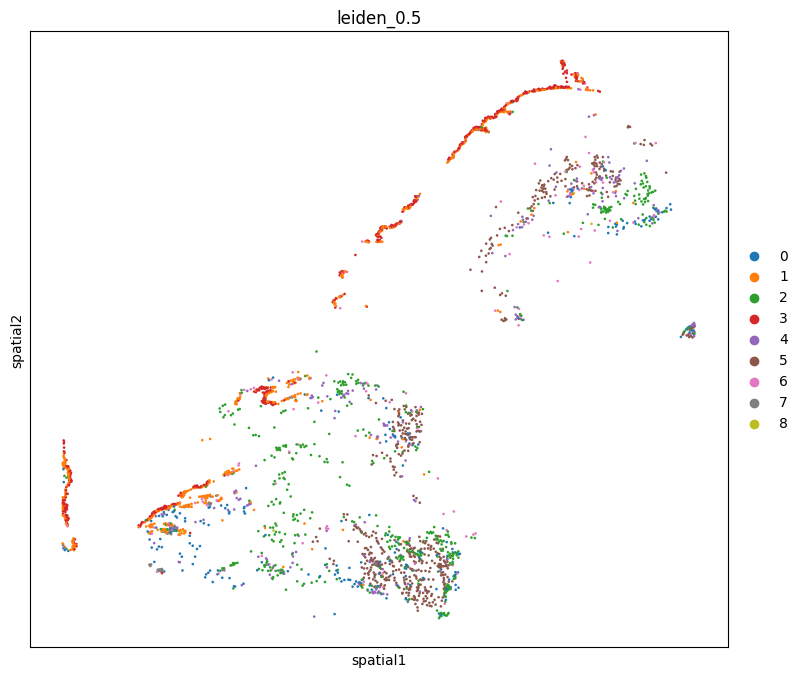

cre_24h


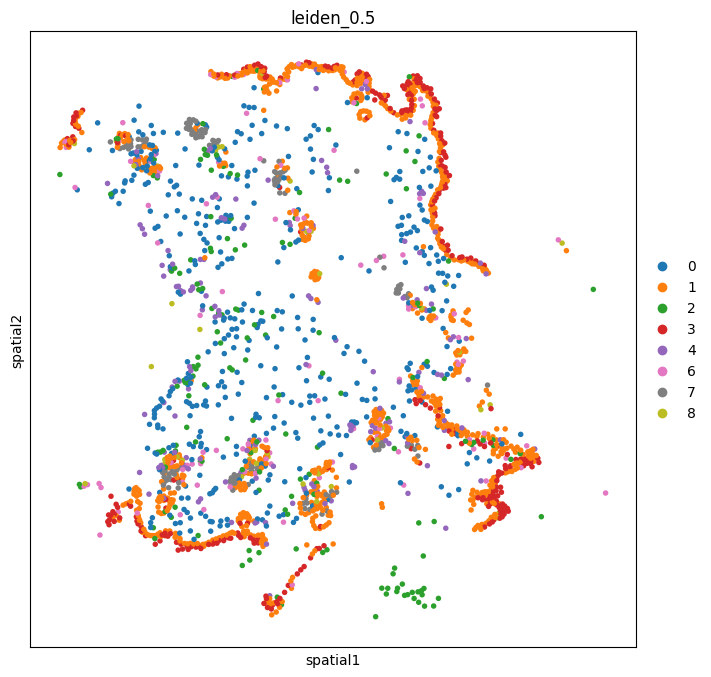

cre_24h


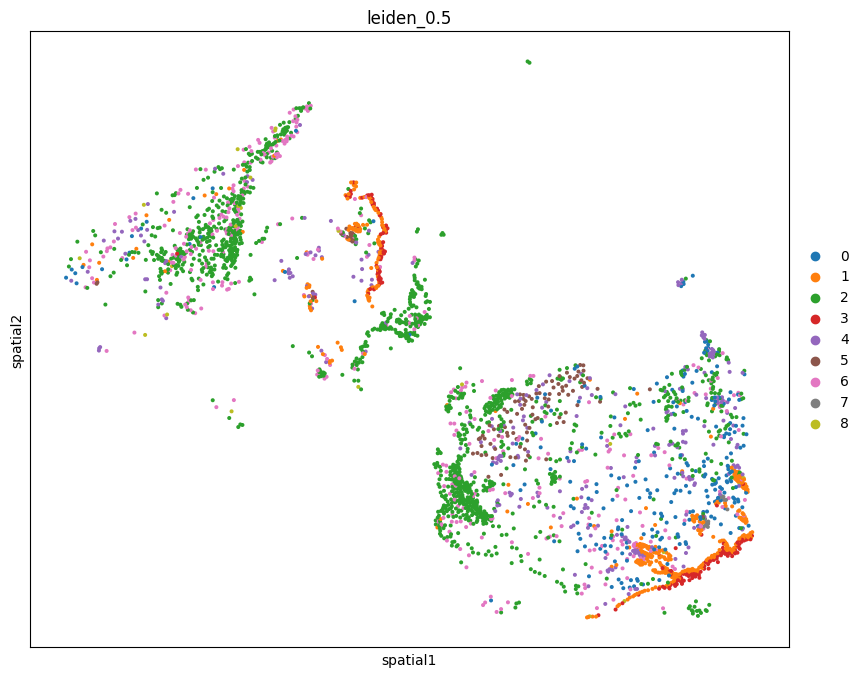

wt_24h


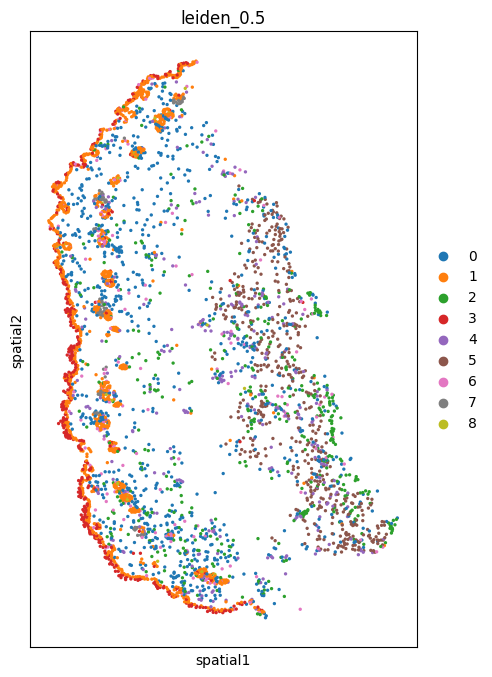

wt_24h


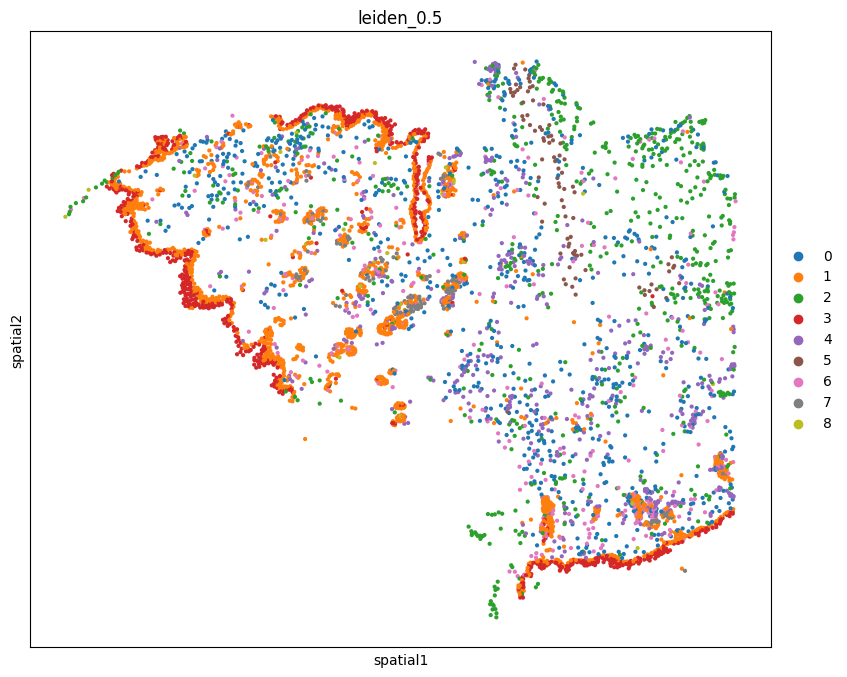

In [17]:
sample_id = []
for grid in ad.obs['sample_id'].unique():    
    ad_int = ad[ad.obs['sample_id'] == grid]
    print(ad_int.obs.condition.unique()[0])
    with plt.rc_context({'figure.figsize': (10, 8)}):
        sc.pl.spatial(ad_int, spot_size=15, color = 'leiden_0.5')
    plt.show()


litt_24h


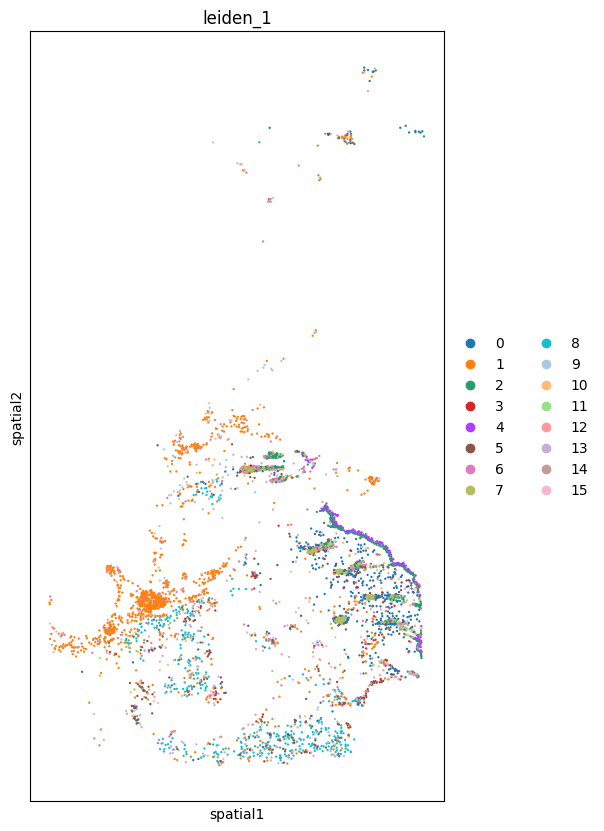

litt_24h


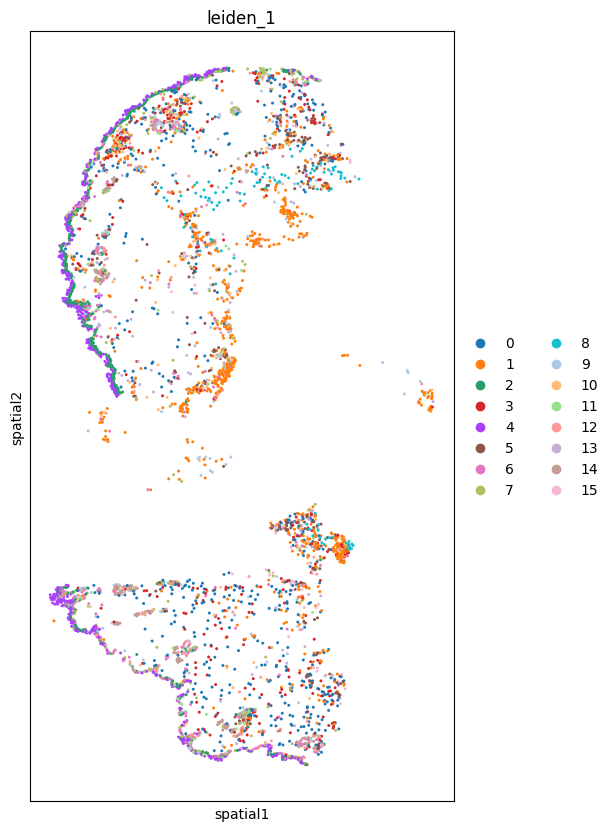

litt_24h


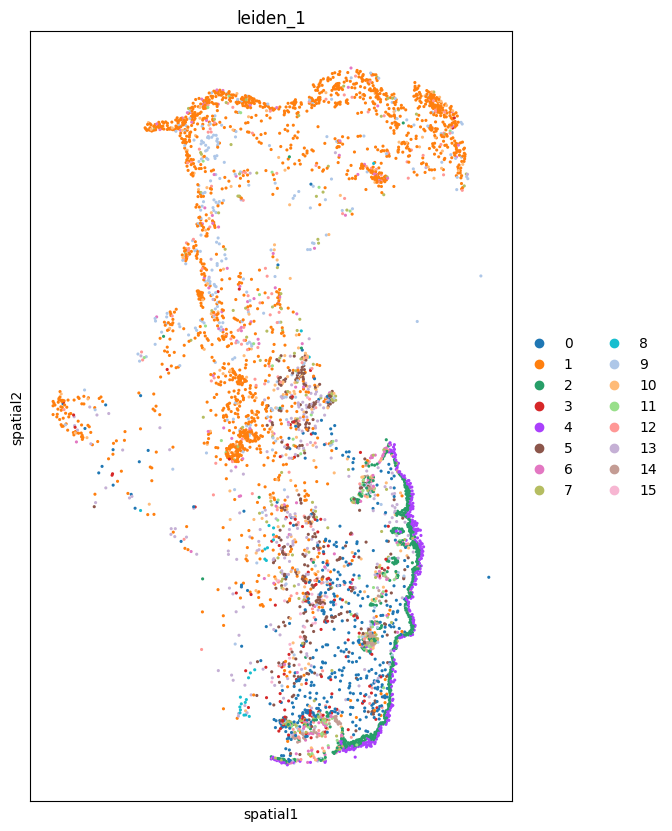

litt_72h


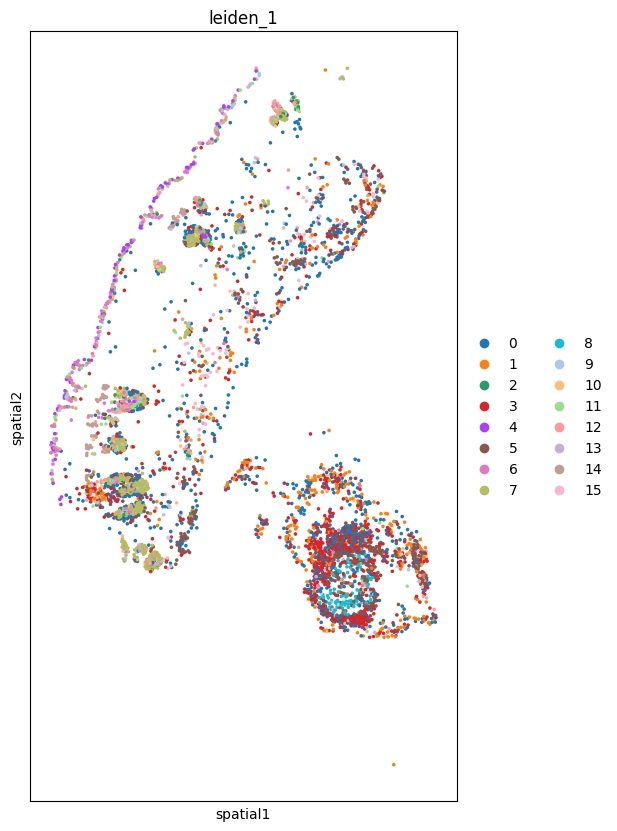

litt_72h


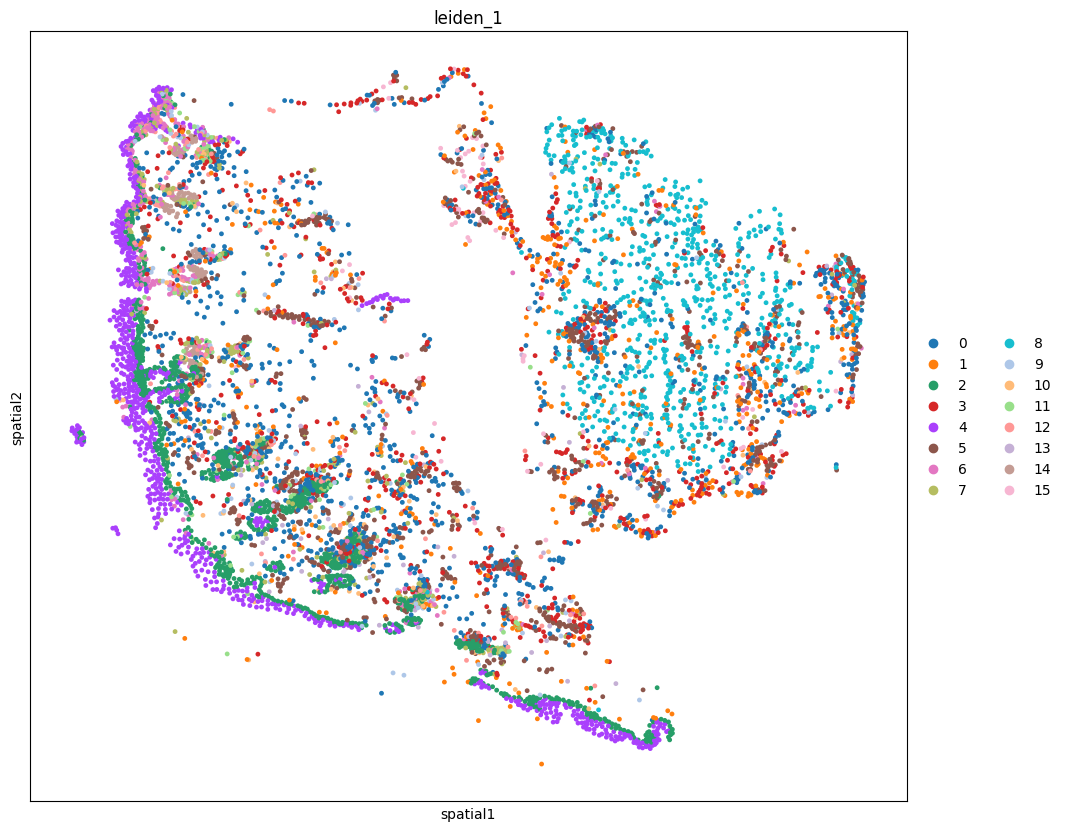

litt_72h


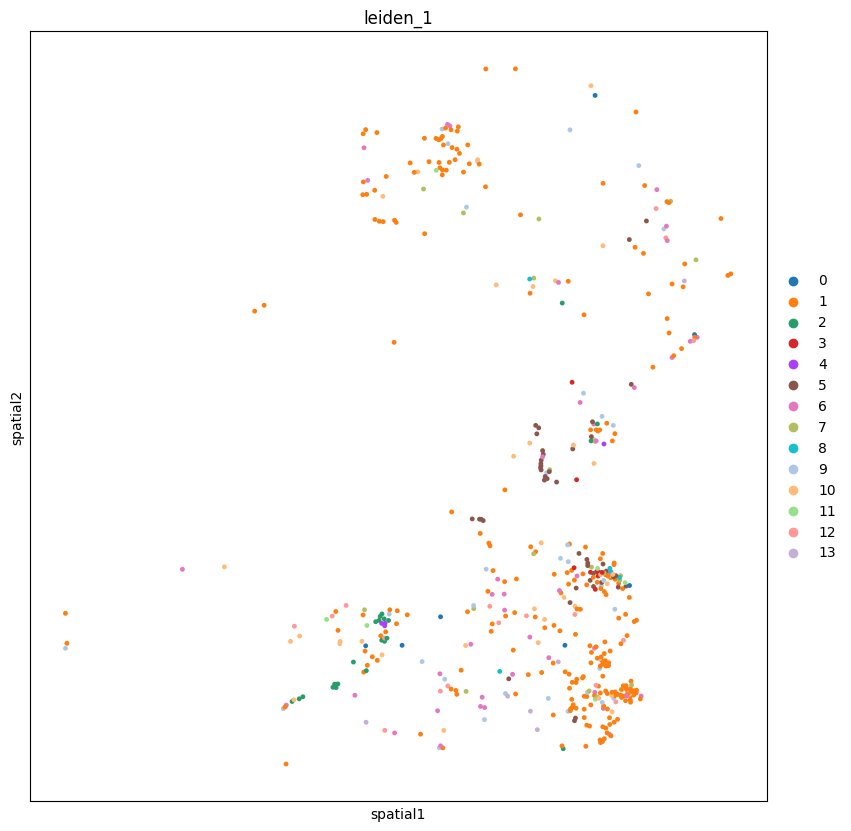

cre_72h


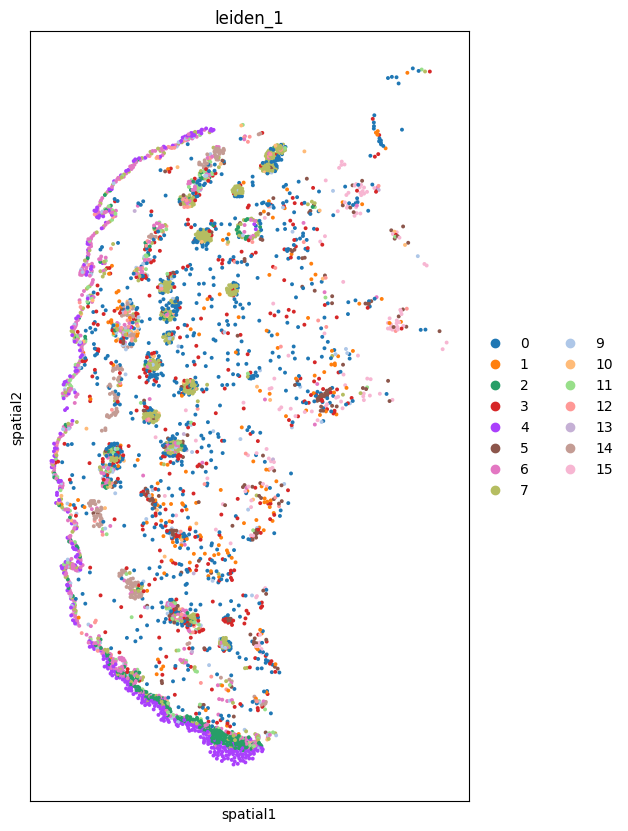

cre_72h


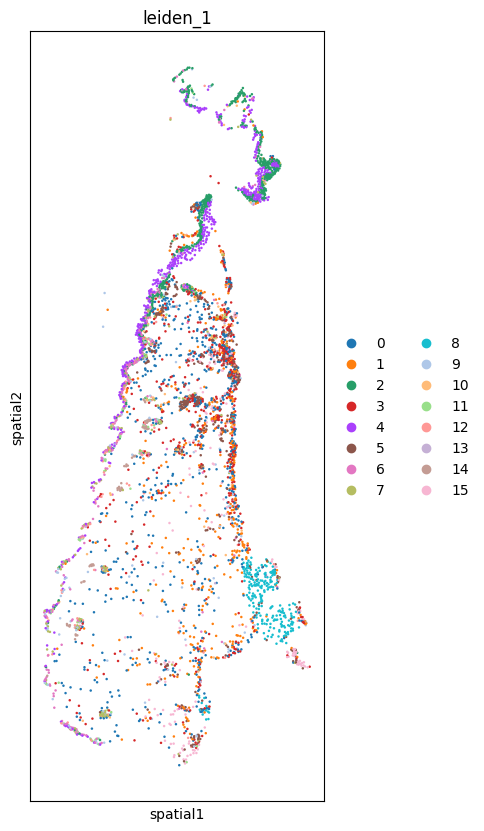

cre_72h


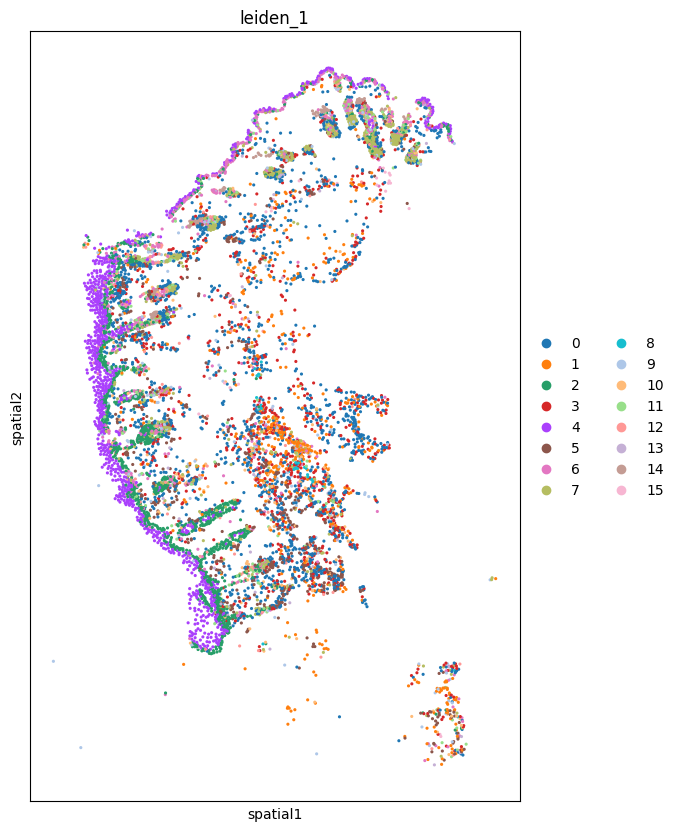

wt_72h


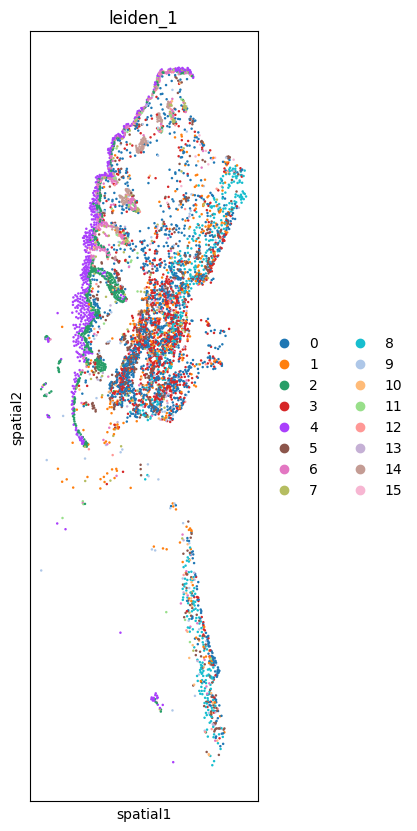

wt_72h


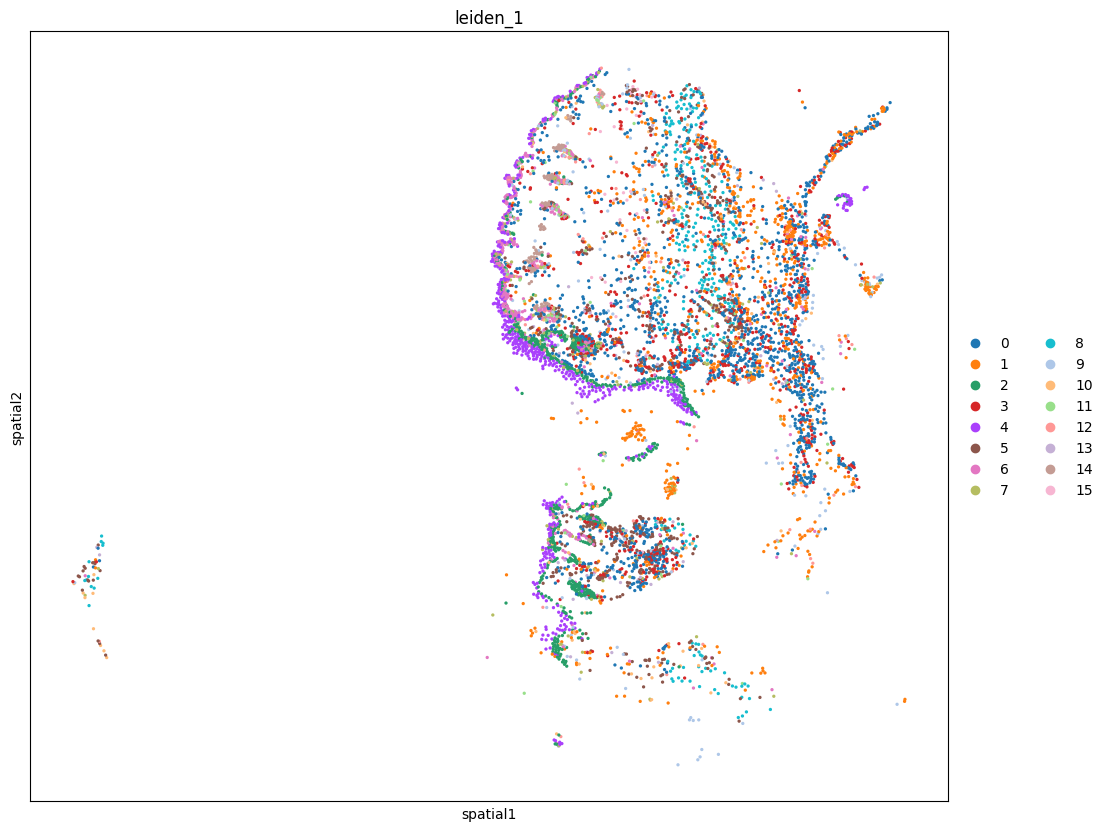

wt_72h


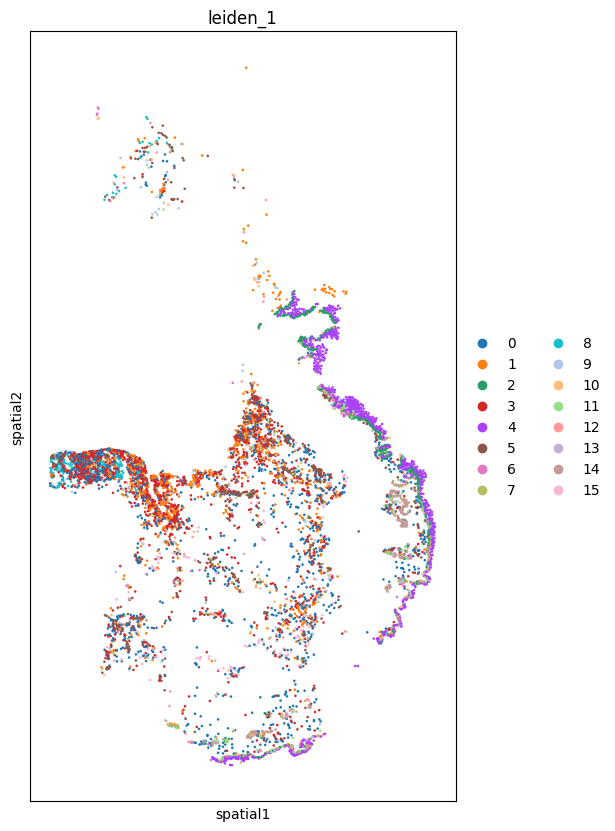

cre_24h


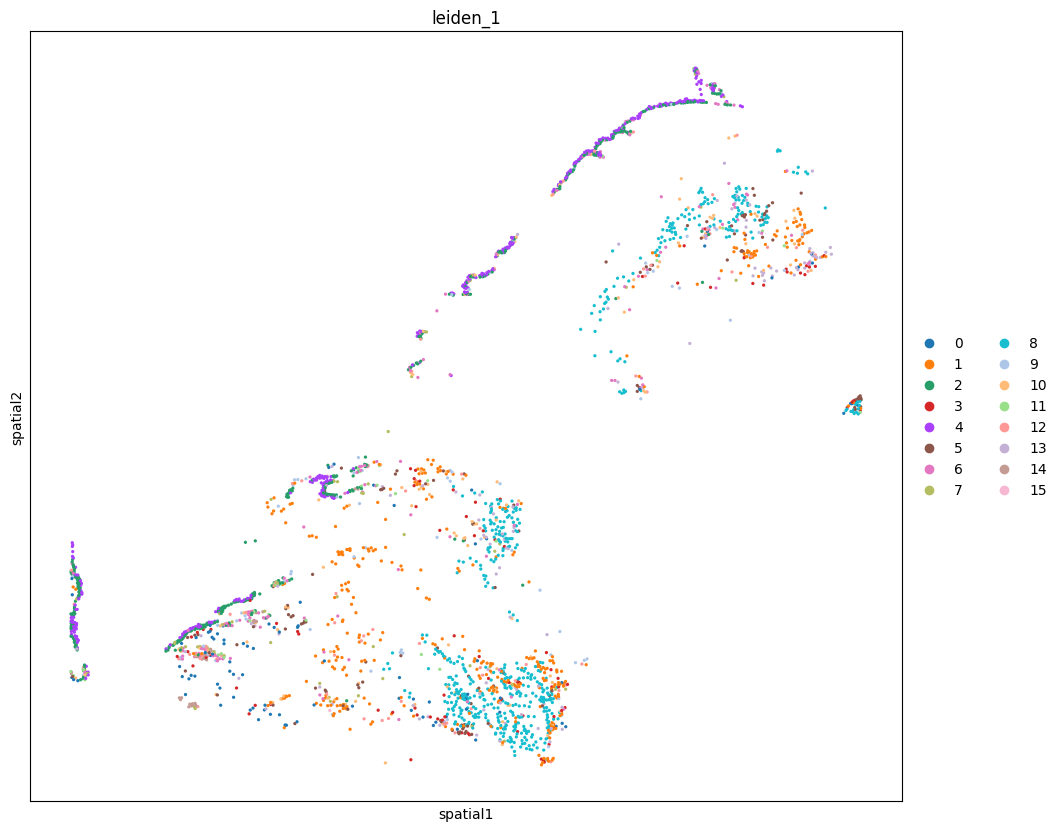

cre_24h


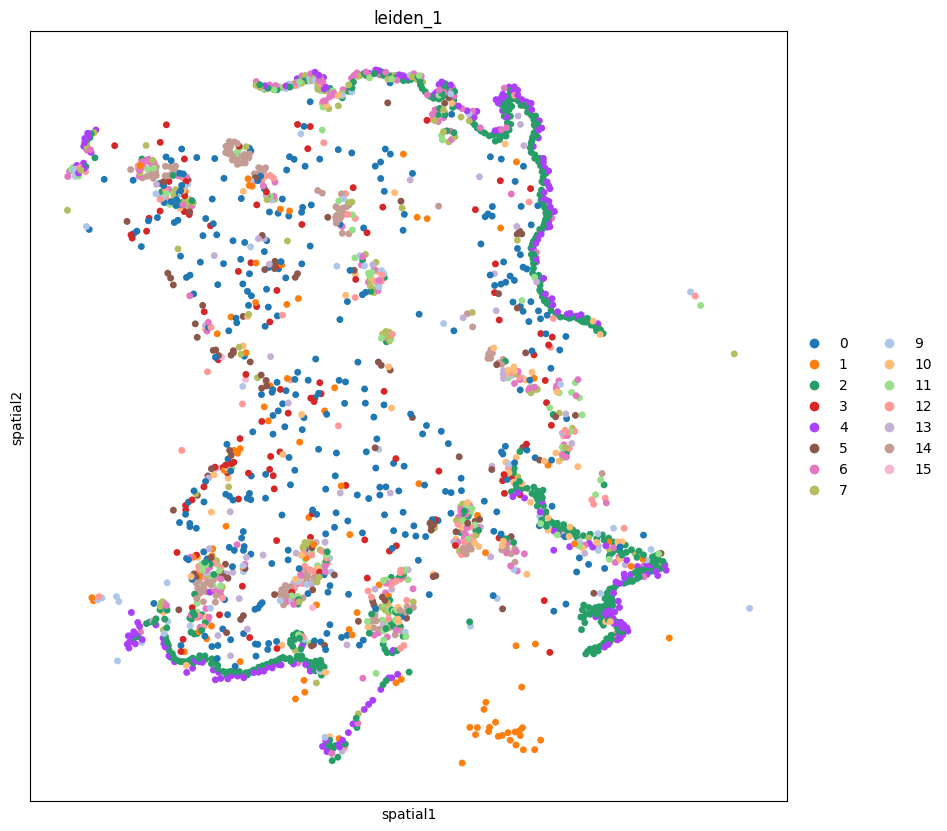

cre_24h


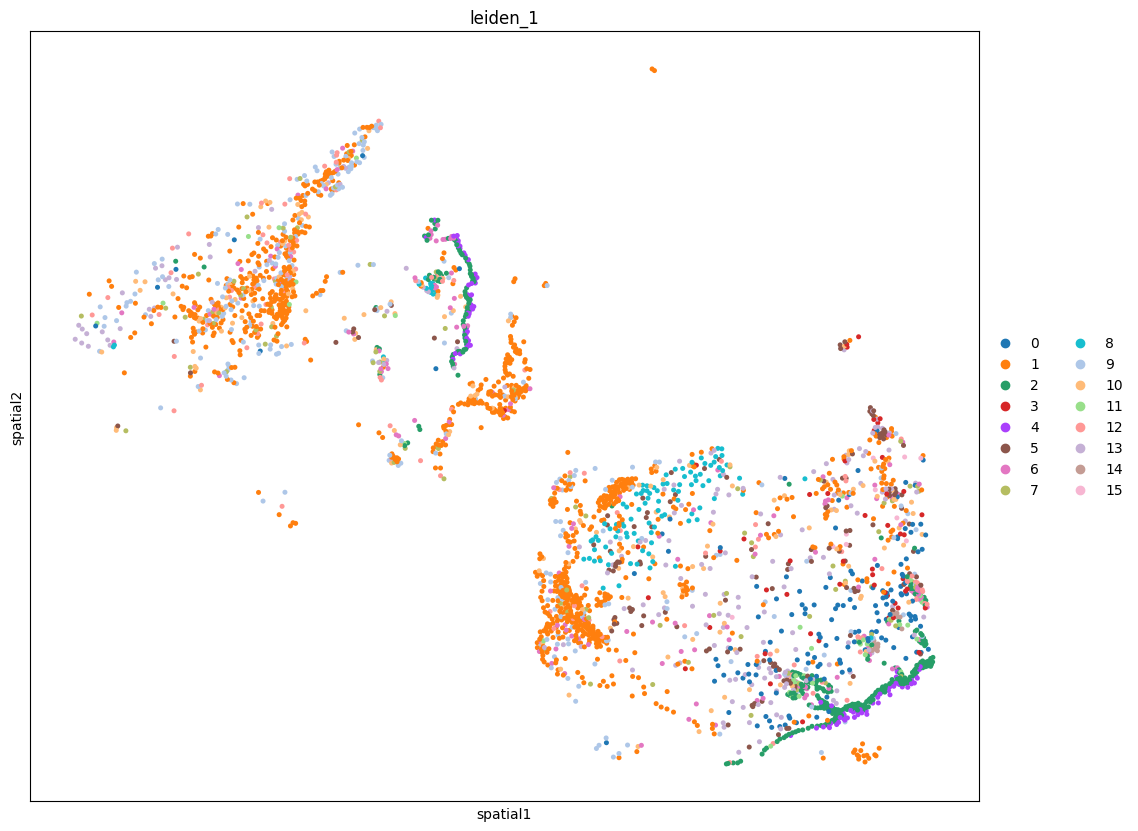

wt_24h


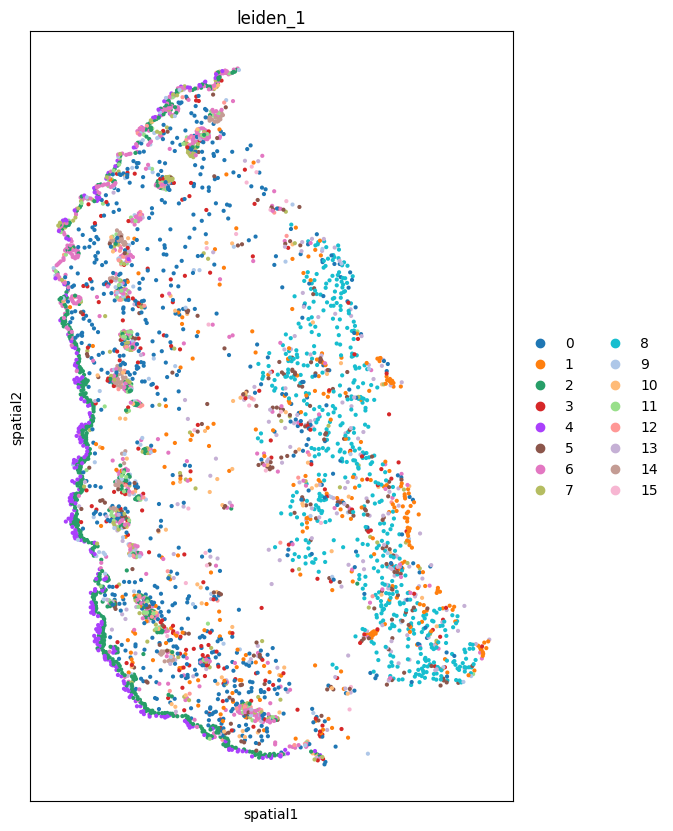

wt_24h


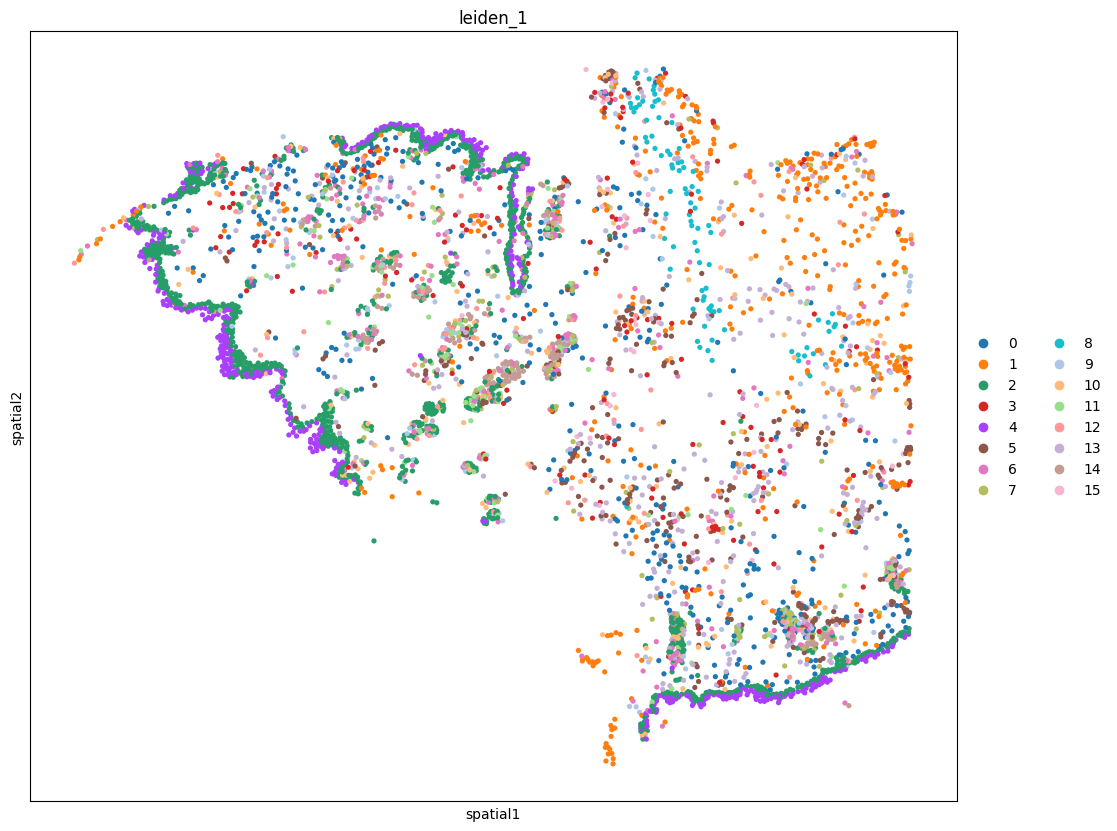

In [18]:
sample_id = []
for grid in ad.obs['sample_id'].unique():    
    ad_int = ad[ad.obs['sample_id'] == grid]
    print(ad_int.obs.condition.unique()[0])
    with plt.rc_context({'figure.figsize': (20, 10)}):
        sc.pl.spatial(ad_int, spot_size=15, color = 'leiden_1')
   
    plt.show()


In [19]:

# assume you have run clustering already
sc.tl.rank_genes_groups(ad, groupby="leiden_0.5", method="wilcoxon")

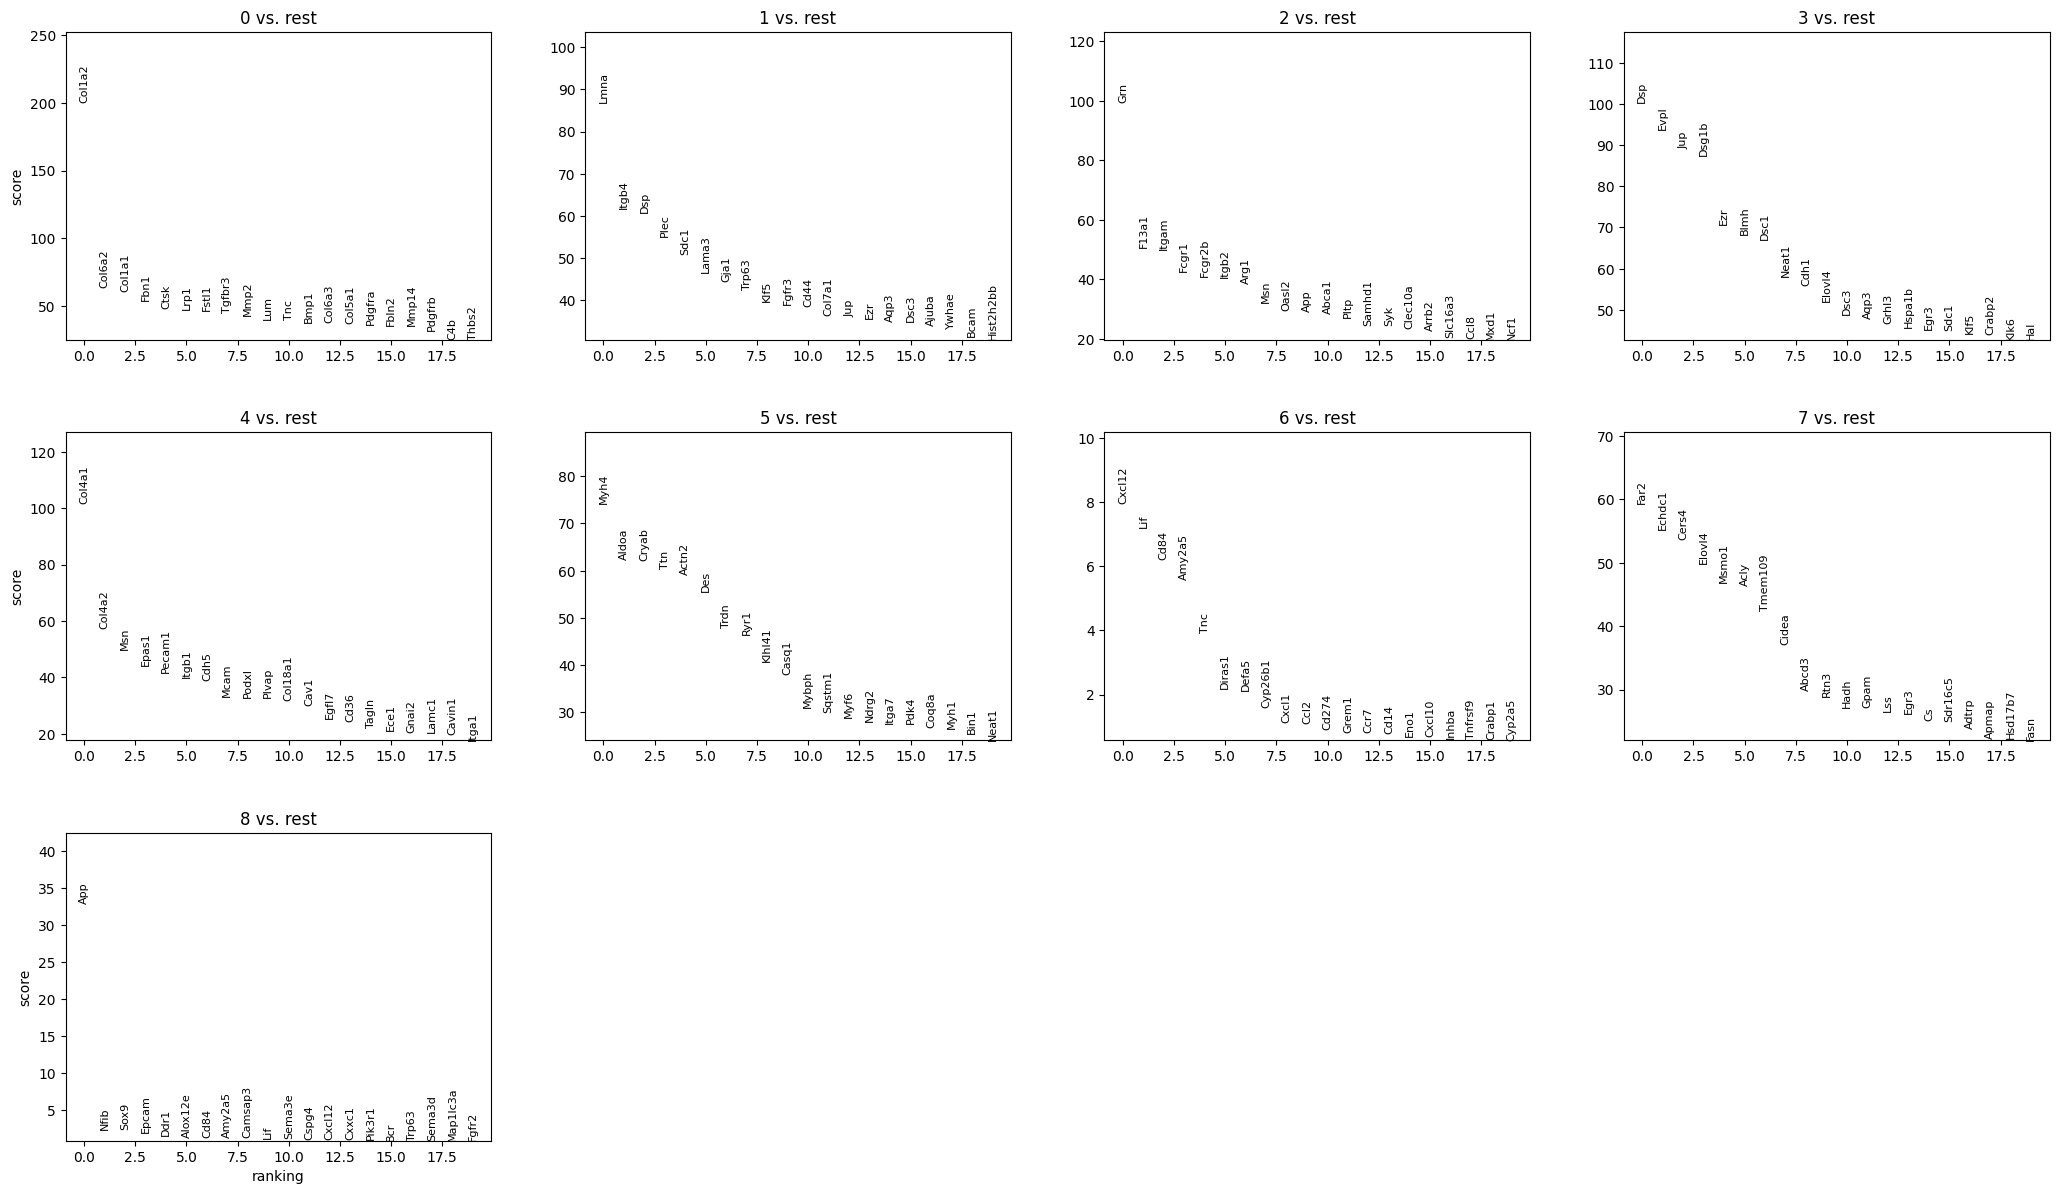

In [20]:
sc.pl.rank_genes_groups(ad, n_genes=20, sharey=False, ncols=4)

In [21]:
marker_genes = pd.DataFrame({
    group: ad.uns['rank_genes_groups']['names'][group][:20]
    for group in ad.uns['rank_genes_groups']['names'].dtype.names
})
marker_genes.head()
#marker_genes.to_csv('../data/broad_markers_leiden0-5.csv')

0      1       2      3       4      5       6       7      8
0  Col1a2   Lmna     Grn    Dsp  Col4a1   Myh4  Cxcl12    Far2    App
1  Col6a2  Itgb4   F13a1   Evpl  Col4a2  Aldoa     Lif  Echdc1   Nfib
2  Col1a1    Dsp   Itgam    Jup     Msn  Cryab    Cd84   Cers4   Sox9
3    Fbn1   Plec   Fcgr1  Dsg1b   Epas1    Ttn  Amy2a5  Elovl4  Epcam
4    Ctsk   Sdc1  Fcgr2b    Ezr  Pecam1  Actn2     Tnc   Msmo1   Ddr1

In [22]:
marker_dict = {}
for col in marker_genes.columns: 
    print(col)
    genes = marker_genes[col].tolist()
    print(" ".join(genes))
    print(' ')
    marker_dict[col] = genes[:3]

0
Col1a2 Col6a2 Col1a1 Fbn1 Ctsk Lrp1 Fstl1 Tgfbr3 Mmp2 Lum Tnc Bmp1 Col6a3 Col5a1 Pdgfra Fbln2 Mmp14 Pdgfrb C4b Thbs2
 
1
Lmna Itgb4 Dsp Plec Sdc1 Lama3 Gja1 Trp63 Klf5 Fgfr3 Cd44 Col7a1 Jup Ezr Aqp3 Dsc3 Ajuba Ywhae Bcam Hist2h2bb
 
2
Grn F13a1 Itgam Fcgr1 Fcgr2b Itgb2 Arg1 Msn Oasl2 App Abca1 Pltp Samhd1 Syk Clec10a Arrb2 Slc16a3 Ccl8 Mxd1 Ncf1
 
3
Dsp Evpl Jup Dsg1b Ezr Blmh Dsc1 Neat1 Cdh1 Elovl4 Dsc3 Aqp3 Grhl3 Hspa1b Egr3 Sdc1 Klf5 Crabp2 Klk6 Hal
 
4
Col4a1 Col4a2 Msn Epas1 Pecam1 Itgb1 Cdh5 Mcam Podxl Plvap Col18a1 Cav1 Egfl7 Cd36 Tagln Ece1 Gnai2 Lamc1 Cavin1 Itga1
 
5
Myh4 Aldoa Cryab Ttn Actn2 Des Trdn Ryr1 Klhl41 Casq1 Mybph Sqstm1 Myf6 Ndrg2 Itga7 Pdk4 Coq8a Myh1 Bin1 Neat1
 
6
Cxcl12 Lif Cd84 Amy2a5 Tnc Diras1 Defa5 Cyp26b1 Cxcl1 Ccl2 Cd274 Grem1 Ccr7 Cd14 Eno1 Cxcl10 Inhba Tnfrsf9 Crabp1 Cyp2a5
 
7
Far2 Echdc1 Cers4 Elovl4 Msmo1 Acly Tmem109 Cidea Abcd3 Rtn3 Hadh Gpam Lss Egr3 Cs Sdr16c5 Adtrp Apmap Hsd17b7 Fasn
 
8
App Nfib Sox9 Epcam Ddr1 Alox12e Cd84 Amy2a5 Camsap3 L

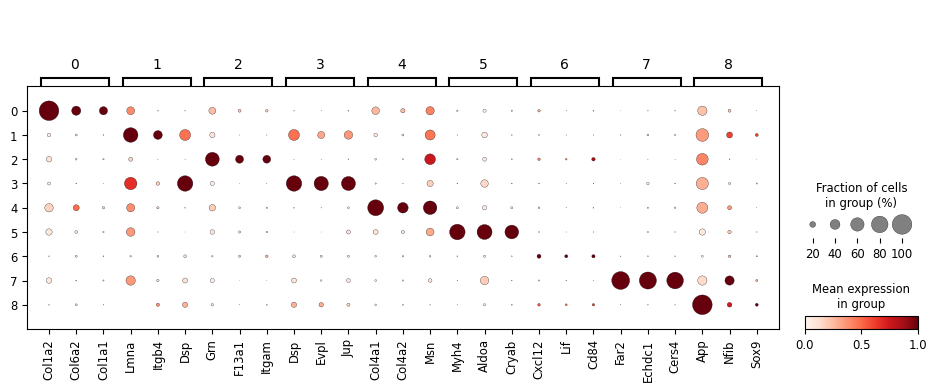

In [23]:
sc.pl.dotplot(ad, marker_dict, groupby="leiden_0.5", standard_scale="var")